In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, scipy, skimage, os
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'Calibri'
mpl.rcParams['font.size'] = 12
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
from scipy.ndimage import gaussian_filter

# Write a function to create new folder
def create_folder(path):
    isExist = os.path.exists(path) 
    if not isExist:
        os.makedirs(path)

def low_pass_filter(image, cutoff=0.3):

    if np.any(np.isnan(image)):
        image_masked = image.copy()
        image_masked[np.isnan(image)]=0
    else:
        image_masked = image
        
    from scipy.fft import fftshift, fft2, ifftshift, ifft2
    image_fft = fft2(image_masked)
    image_fft = fftshift(image_fft)
    
    # create a low-pass filter image
    fftys, fftxs = image_fft.shape
    fftr = fftxs/2 * cutoff #size of circle
    low_pass_filter = np.zeros_like(image)
    for i in range(fftxs):
        for j in range(fftys):
            if (i - fftxs/2)**2 + (j - fftys/2)**2 < fftr**2:
                low_pass_filter[j,i] = 1
    
    image_fft_filtered = image_fft * low_pass_filter
    #inverse fft
    image_fft_lpf = np.real(ifft2(ifftshift(image_fft_filtered)))
    
    if np.any(np.isnan(image)):
        image_fft_lpf[np.isnan(image)]=np.nan

    # fig,[ax,ax1, ax2] = plt.subplots(1,3)
    # ax.imshow(image)
    # ax1.imshow(image_fft_lpf)
    # ax2.imshow(image - image_fft_lpf)
    # plt.show()
    
    return image_fft_lpf


def export_2d_data_with_cmap(name, array, cmap, vminmax):
    image = array
    color_converter = plt.colormaps[cmap]
    image_scaled = (image-vminmax[0])/(vminmax[1]-vminmax[0])
    image_colored = color_converter(image_scaled)
    image_colored = skimage.color.rgba2rgb(image_colored)
    image_colored = skimage.util.img_as_ubyte(image_colored)
    if image.ndim == 2:
        skimage.io.imsave(name, image_colored)
    elif image.ndim == 3:
        create_folder(name[:-4])
        for i in range(image.shape[0]):
            skimage.io.imsave(name[:-4] + '\\' + str(i) + name, image_colored[i])

In [3]:
# set the working directory
# os.chdir('D:/User_data/XinT/processing/rep3_furrow_geometry_analysis')
os.chdir('H:\Xin home drive\data_meroblastic\Analysis\geometry analysis\\analyzing with actin\\rep3')

<>:3: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\X'
C:\Users\xtong\AppData\Local\Temp\ipykernel_15312\3273783528.py:3: SyntaxWarning: invalid escape sequence '\X'
  os.chdir('H:\Xin home drive\data_meroblastic\Analysis\geometry analysis\\analyzing with actin\\rep3')


In [4]:
# load the raw data
data_raw = skimage.io.imread('XIN210822_LSM9001_DCLKegfp_UtrmCherry_e1_f22-50_pro1.tif')
data_raw_max = np.max(data_raw, axis=1)
data2_raw = skimage.io.imread('XIN210822_LSM9001_DCLKegfp_UtrmCherry_e1_f22-50_pro1_sectionmidy.tif')

In [5]:
top_view_vmin, top_view_vmax = 0, 16000
perpsec_view_vmin, perpsec_view_vmax = 0, 12000

pixel_size = 1.2479
voxel_depth = 3
time_interval = 47
fs, zs, ys, xs = data_raw.shape
hs = round(zs*voxel_depth/pixel_size)

In [ ]:
f_m2 = 38-22
f_septum1 = 41-22   #57.5
dev_time = (np.arange(0, fs)-f_septum1) * time_interval/60 +57.5
dev_time = np.round(dev_time, 1)
dev_time

frames_to_show_in_figure1 = np.array([24,29,34,40,45,50])-22

array([42.6, 43.4, 44.2, 45. , 45.8, 46.5, 47.3, 48.1, 48.9, 49.7, 50.4,
       51.2, 52. , 52.8, 53.6, 54.4, 55.2, 55.9, 56.7, 57.5, 58.3, 59.1,
       59.8, 60.6, 61.4, 62.2, 63. , 63.8, 64.6])

# Height map

In [9]:
# smoothen the data with a very extreme sigma, for the surface detection
# data_smooth = fiji_gaussian(data_raw, sigma=3)
# data_smooth_max = np.max(data_smooth, axis=1)
data_smooth = gaussian_filter(data_raw, sigma=3, axes = [1,2,3])
data_smooth_max = np.max(data_smooth, axis=1)

frame 0


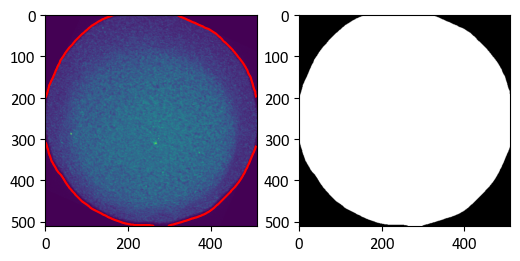

frame 1


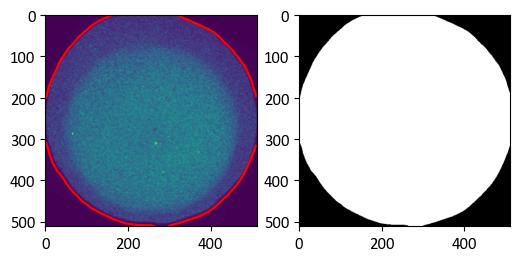

frame 2


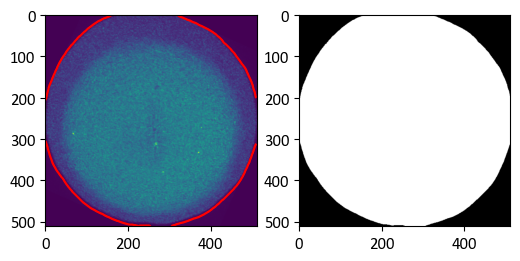

frame 3


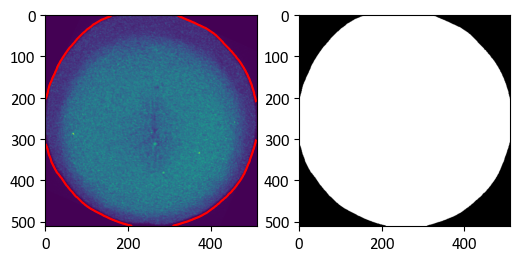

frame 4


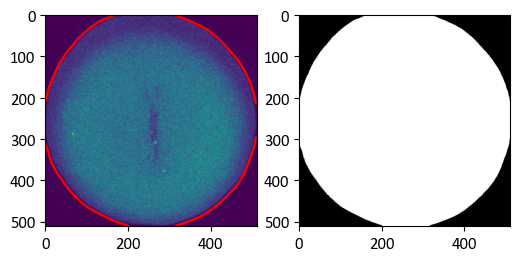

frame 5


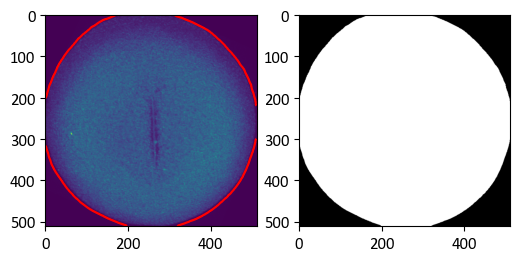

frame 6


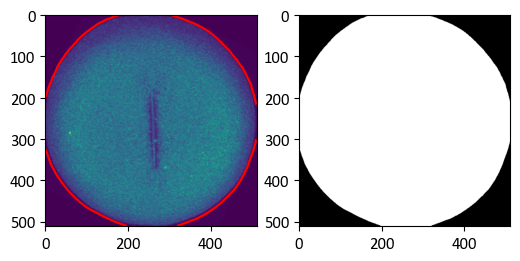

frame 7


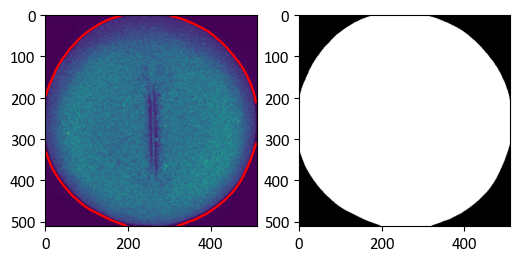

frame 8


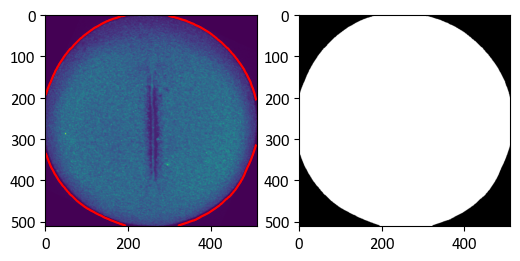

frame 9


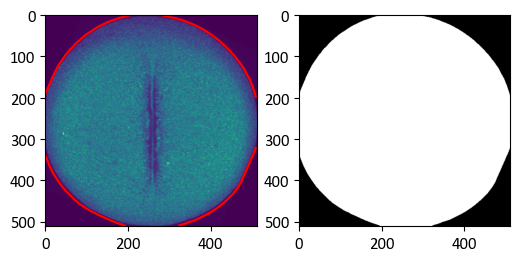

frame 10


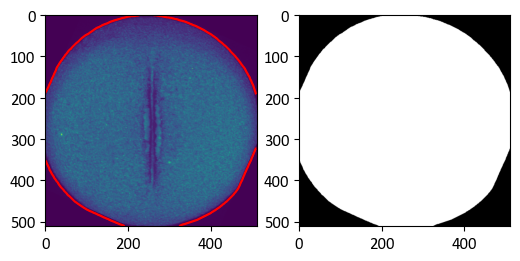

frame 11


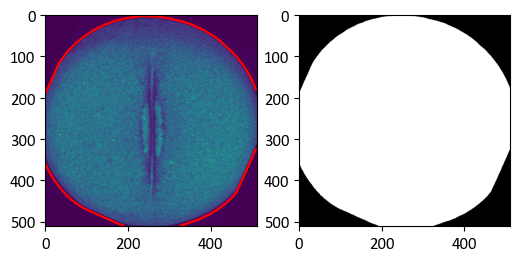

frame 12


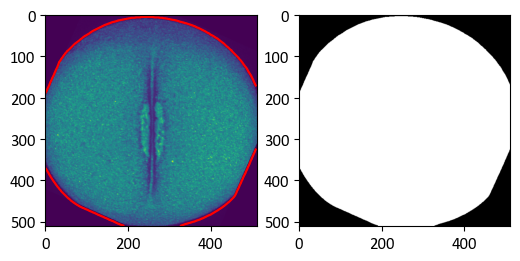

frame 13


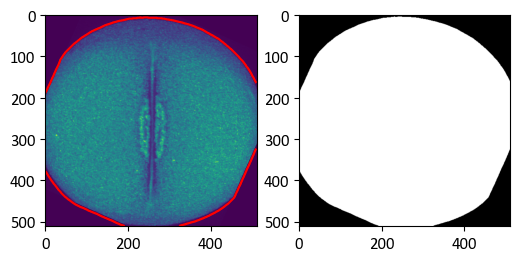

frame 14


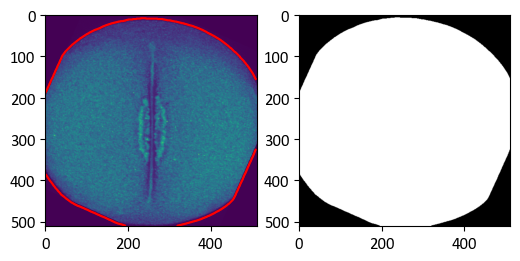

frame 15


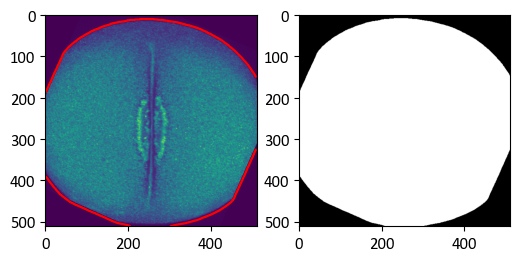

frame 16


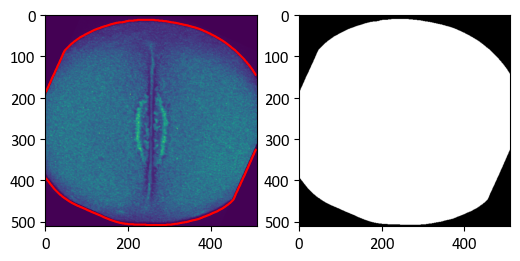

frame 17


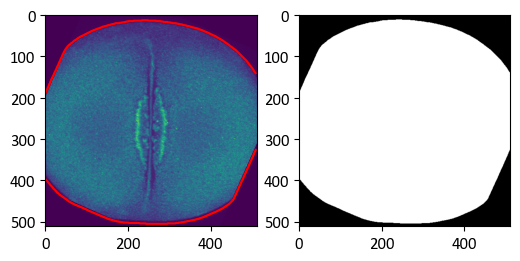

frame 18


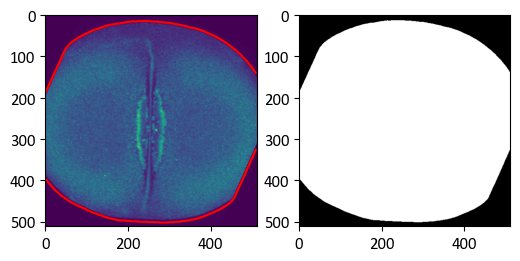

frame 19


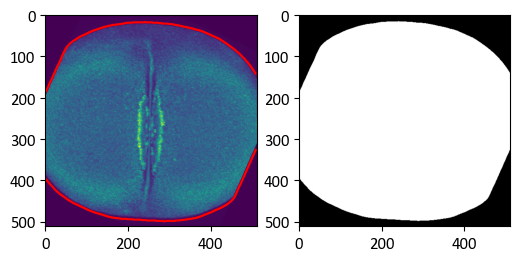

frame 20


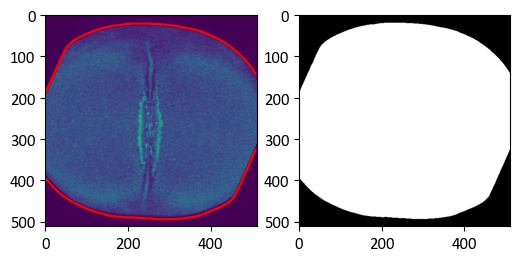

frame 21


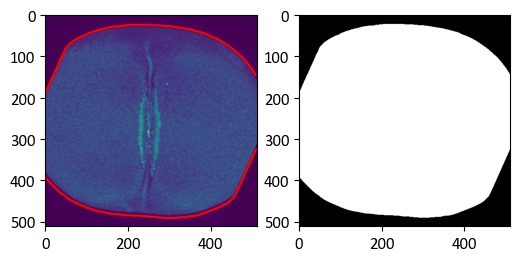

frame 22


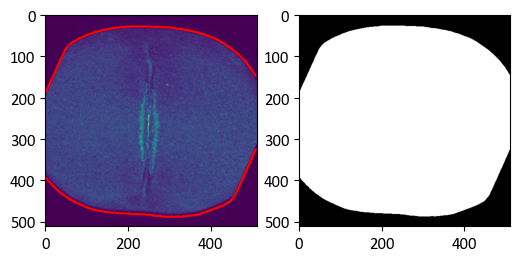

frame 23


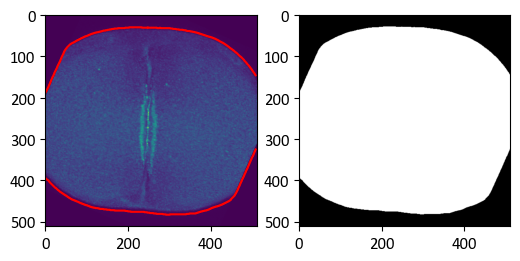

frame 24


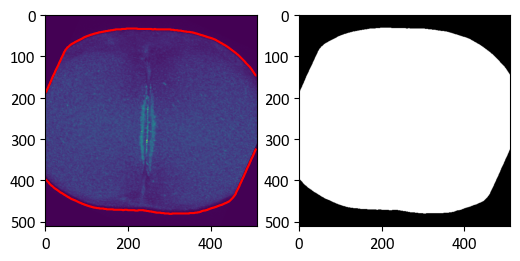

frame 25


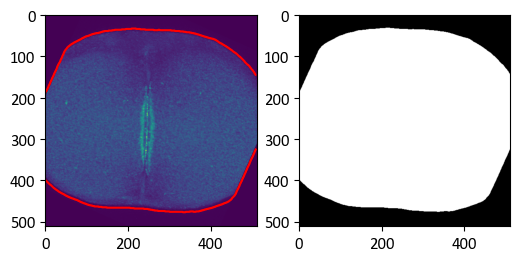

frame 26


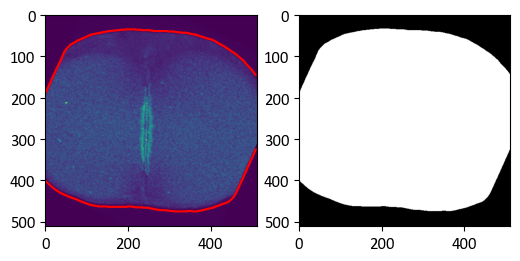

frame 27


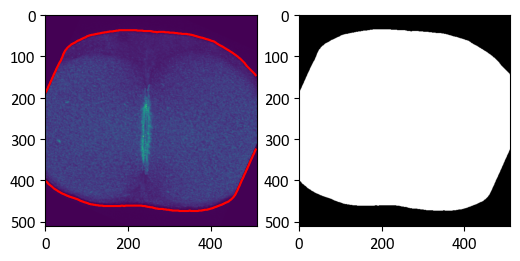

frame 28


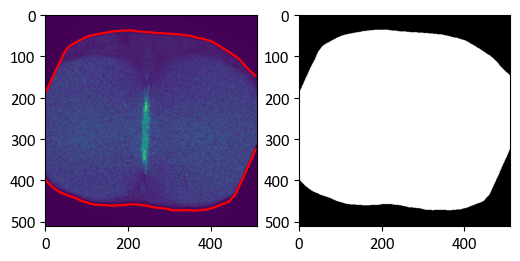

C:\Users\xtong\AppData\Local\Temp\ipykernel_21256\1378902359.py:10: UserWarning: mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave('mask.tif', mask)


In [10]:
# mask a mask
mask = data_smooth_max > np.percentile(data_smooth_max, 20)
for f in range(fs):
    print('frame', f)
    fig, [ax, ax1] = plt.subplots(1,2, figsize=[6,3])
    ax.imshow(data_raw_max[f])
    ax.contour(mask[f], colors='r')
    ax1.imshow(mask[f], cmap='Greys_r')
    plt.show()
skimage.io.imsave('mask.tif', mask)

frame 0


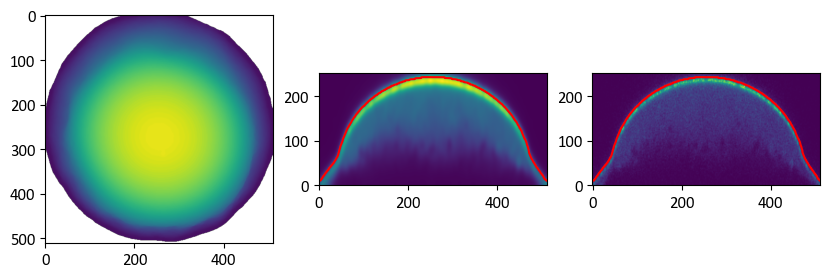

frame 1


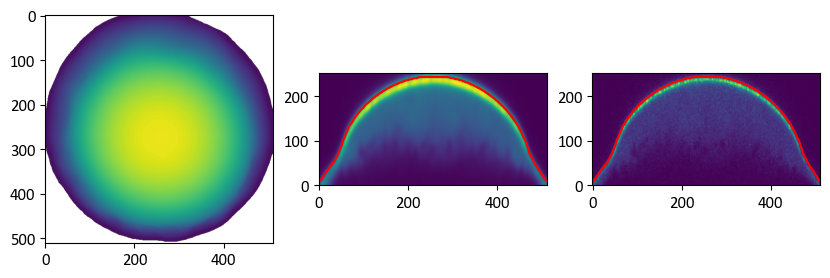

frame 2


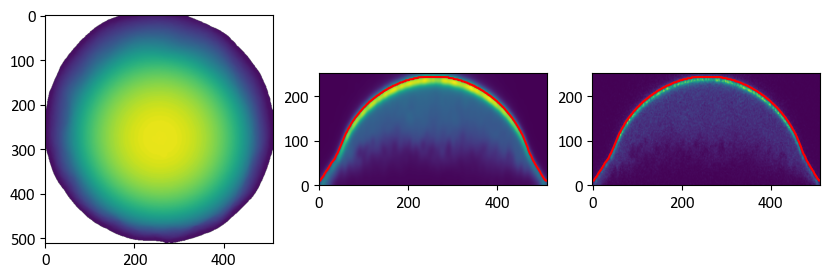

frame 3


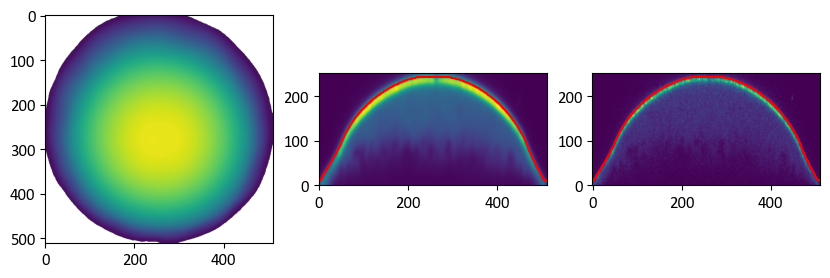

frame 4


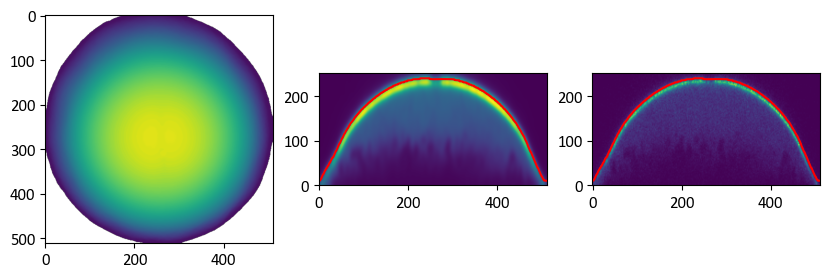

frame 5


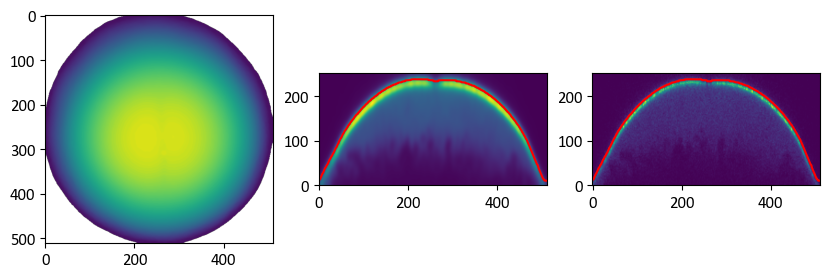

frame 6


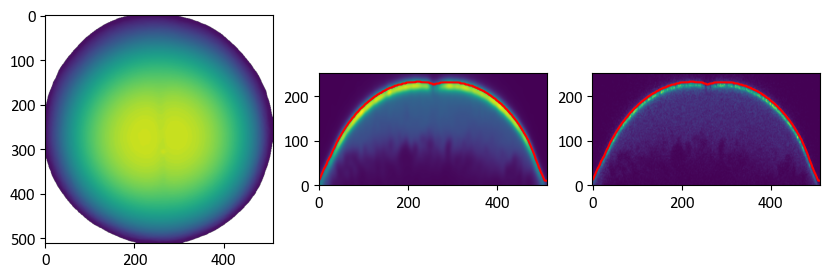

frame 7


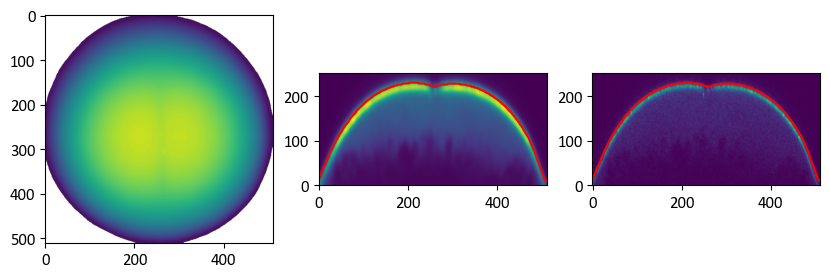

frame 8


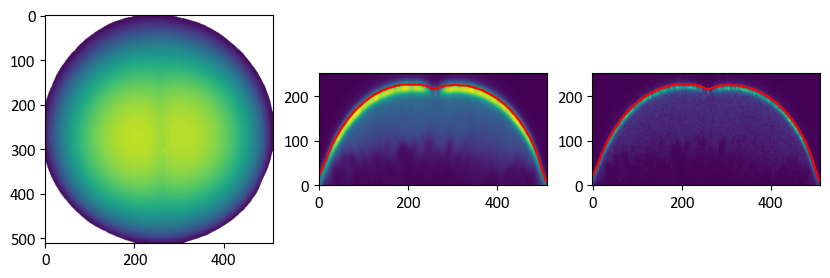

frame 9


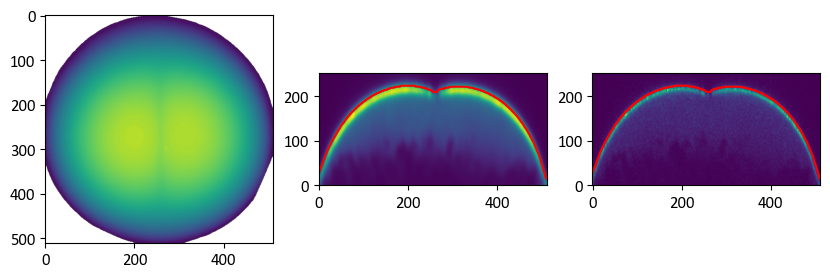

frame 10


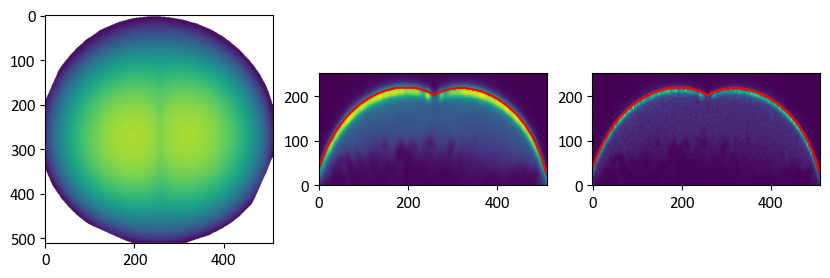

frame 11


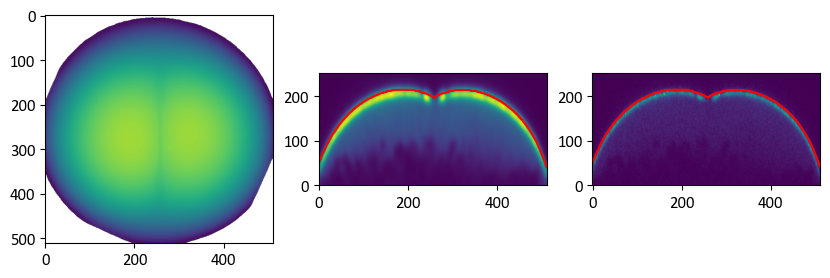

frame 12


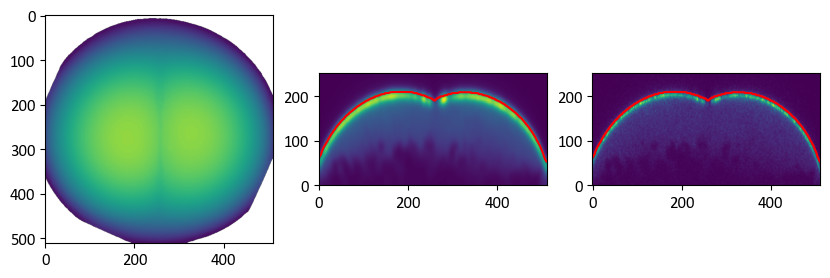

frame 13


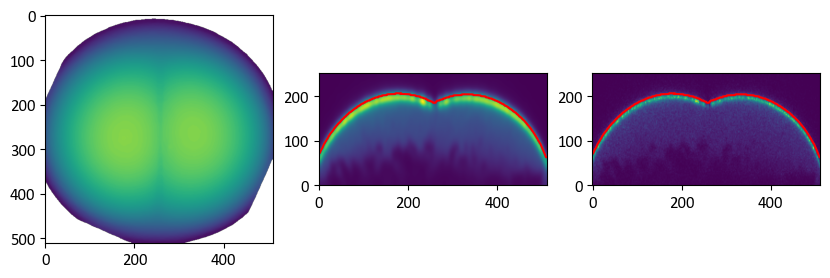

frame 14


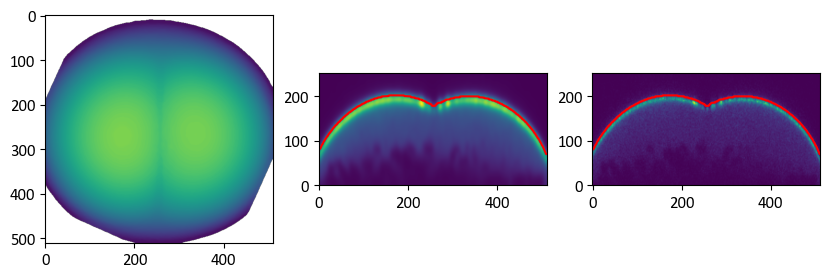

frame 15


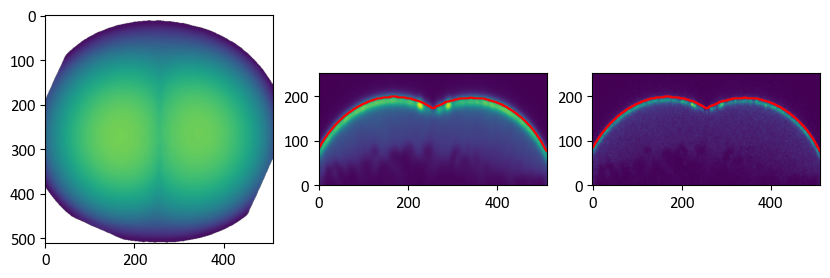

frame 16


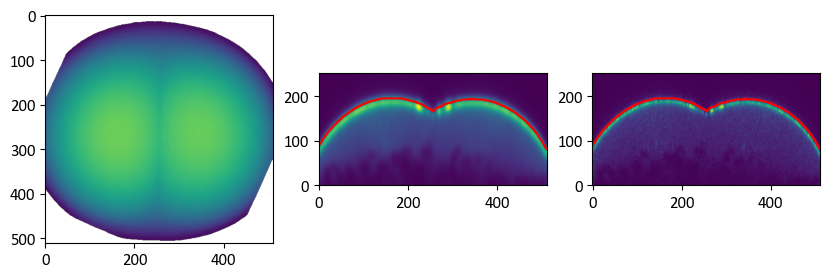

frame 17


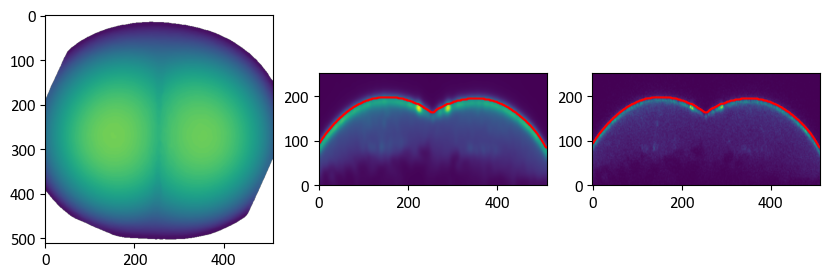

frame 18


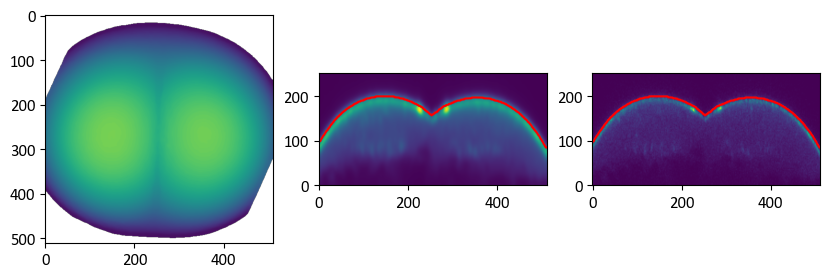

frame 19


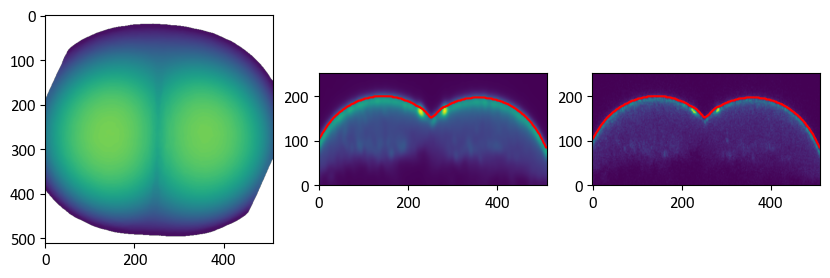

frame 20


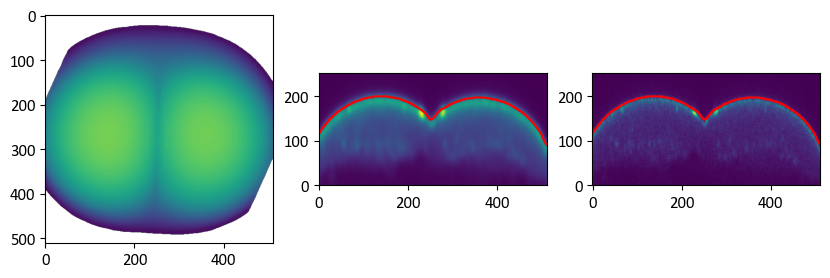

frame 21


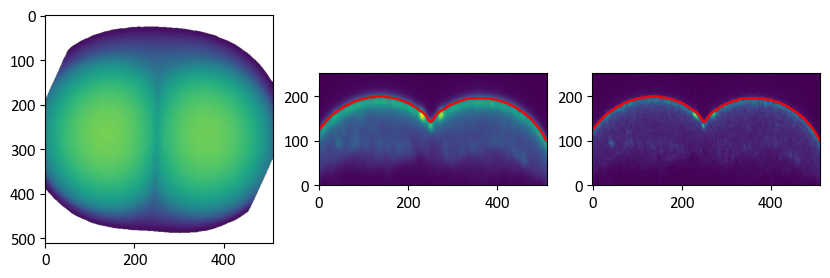

frame 22


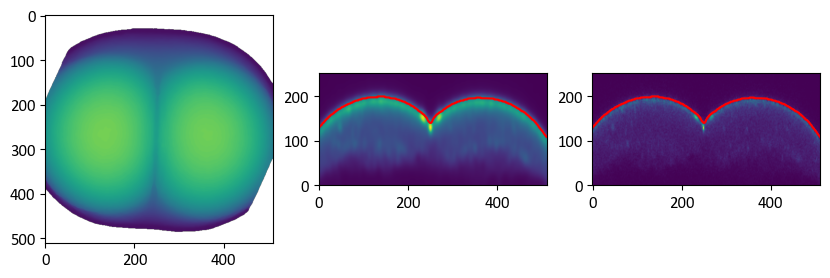

frame 23


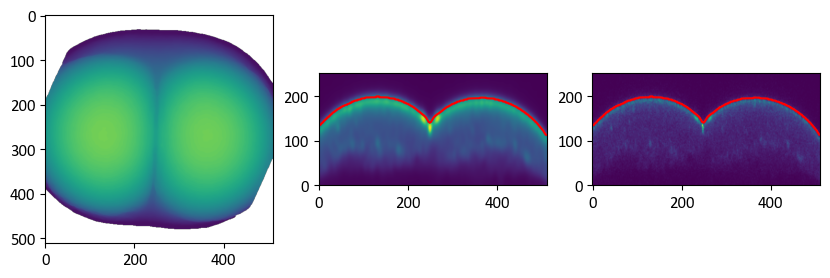

frame 24


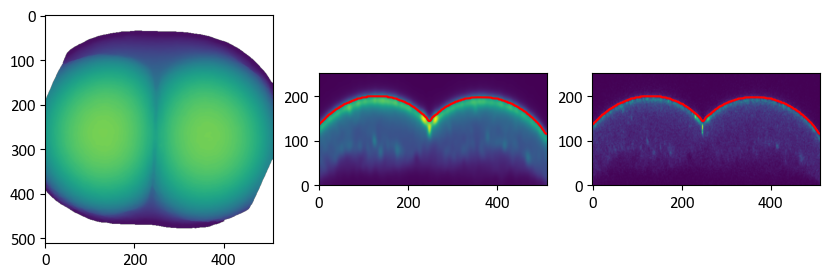

frame 25


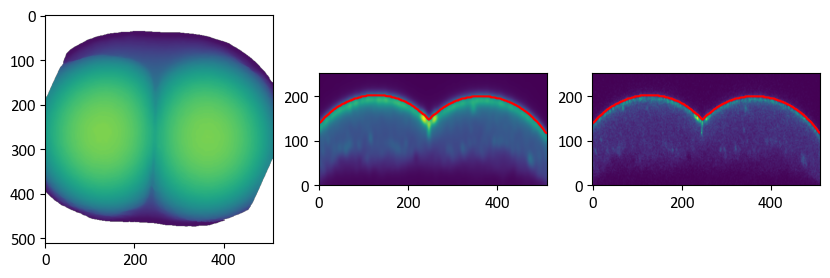

frame 26


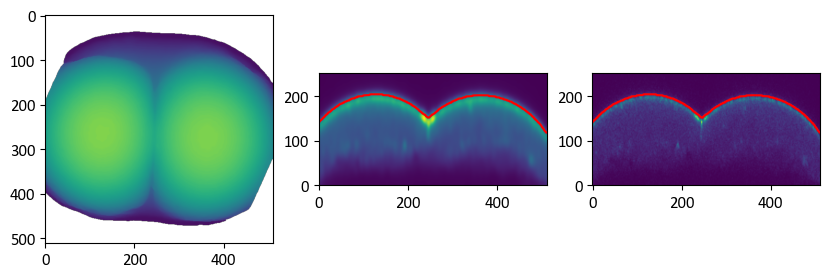

frame 27


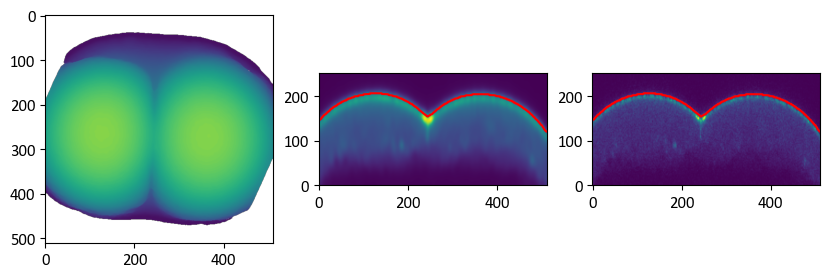

frame 28


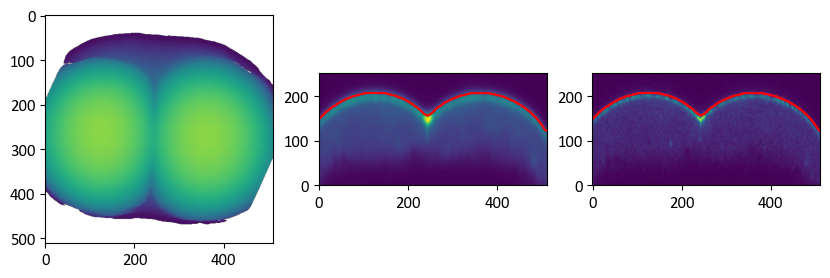

In [ ]:
# get the surface (another way)
from skimage.transform import rescale
from scipy.interpolate import CubicSpline

height = np.zeros([fs, ys, xs])

folder_export_height = 'height'
create_folder(folder_export_height)

for f in range(0, fs):
# for f in [10]:
    print('frame', f)
    h = np.zeros([ys, xs])

    # plt.imshow(data_smooth[f,50,:])
    for y in range(ys):
    # for y in [256]:
        # print(y)
        y_slice = data_smooth[f, :, y]
        y_slice = rescale(y_slice, [voxel_depth/pixel_size, 1], preserve_range=True)
        y_slice = np.flip(y_slice, axis=0)

        for x in range(xs):
        # for x in [200]:
            z_stick = y_slice[:, x]
            z_stick_prime = np.gradient(z_stick)
            # interp module
            zold = np.arange(hs)
            spl = CubicSpline(zold, z_stick_prime)
            znew = np.linspace(0,hs,hs*10+1)
            z_stack_prime_interp = spl(znew)
            z_stick_prime = z_stack_prime_interp

            z_stick_prime_peaks, _ = scipy.signal.find_peaks(z_stick_prime, height=25)
            if len(z_stick_prime_peaks) != 0:
                h[y,x] = znew[z_stick_prime_peaks[0]]

    h = hs-h
    h[h == hs] = np.nan 

    fig, [ax, ax1, ax2] = plt.subplots(1,3,figsize=[10,3])
    ax.imshow(h, vmin=0, vmax=hs)
    ax1.plot(h[int(ys/2), :], color='red')
    ax1.imshow(rescale(data_smooth[f,:,int(ys/2)], [voxel_depth/pixel_size, 1]))
    ax1.invert_yaxis()
    ax2.plot(h[int(ys/2), :], color='red')
    ax2.imshow(rescale(data_raw[f,:,int(ys/2)], [voxel_depth/pixel_size, 1]))
    ax2.invert_yaxis()
    plt.show()
    
    skimage.io.imsave(folder_export_height + '\\' + str(f) + '.tif', h)
    height[f] = h
    
# save the surface
skimage.io.imsave('height.tif', height)


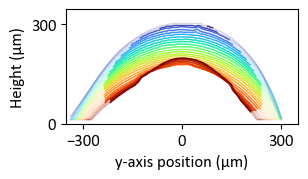

In [81]:
fig, ax = plt.subplots(figsize=[3,3])
for f in range(fs):
    # print('frame', f)
    fu_1, fu_2 = fu_range[f]
    if not np.isnan(fu_1):
        ax.plot((np.arange(ys)-center_y)*pixel_size, fu_h_para[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1, alpha=.2)
        ax.plot(((np.arange(ys)-center_y)*pixel_size)[int(fu_1):int(fu_2)],
                (fu_h_para[f]*pixel_size)[int(fu_1):int(fu_2)], color = time_cmap((f-2)/(fs-3)), lw=1)
        ax.set_aspect('equal')

ax.set_aspect('equal')
ax.set_ylim(0, hs*pixel_size*1.1)
ax.set_yticks(np.arange(0, 301, 300))
ax.set_xlim(-xs/2*pixel_size*1.1, xs/2*pixel_size*1.1)
ax.set_xticks(np.arange(-300, 301, 300)) 
ax.set_ylabel('Height (\u03BCm)')
ax.set_xlabel('y-axis position (\u03BCm)')
plt.savefig('cf_labeling_xz.svg')
plt.show()

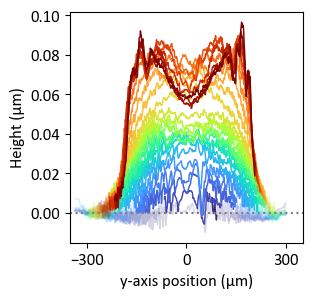

In [82]:
fig, ax = plt.subplots(figsize=[3,3])
for f in range(fs):
    # print('frame', f)
    fu_1, fu_2 = fu_range[f]
    if not np.isnan(fu_1):
        ax.plot((np.arange(ys)-center_y)*pixel_size, fu_k1_para[f], color = time_cmap((f-2)/(fs-3)), lw=1, alpha=.2)
        ax.plot(((np.arange(ys)-center_y)*pixel_size)[int(fu_1):int(fu_2)],
                (fu_k1_para[f])[int(fu_1):int(fu_2)], color = time_cmap((f-2)/(fs-3)), lw=1)

ax.axhline(y=0, color='grey', ls=':')
# ax.set_aspect('equal')
# ax.set_ylim(0, hs*pixel_size*1.1)
# ax.set_yticks(np.arange(0, 301, 300))
ax.set_xlim(-xs/2*pixel_size*1.1, xs/2*pixel_size*1.1)
ax.set_xticks(np.arange(-300, 301, 300)) 
ax.set_ylabel('Height (\u03BCm)')
ax.set_xlabel('y-axis position (\u03BCm)')
plt.show()

[42.6 43.4 44.2 45.  45.8 46.5 47.3 48.1 48.9 49.7 50.4 51.2 52.  52.8
 53.6 54.4 55.2 55.9 56.7 57.5 58.3 59.1 59.8 60.6 61.4 62.2 63.  63.8
 64.6]


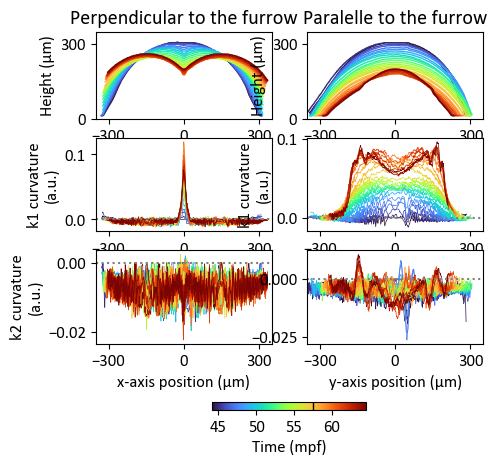

In [83]:
from matplotlib import colors
time_cmap = plt.colormaps["turbo"]

fig, axs = plt.subplots(3,2, figsize=[5,5])
for f in range(2, fs):
    # print('frame', f)
    center_y = fu_coord_center[:, 1][fu_coord_center[:, 0] == f][0]
    axs[0,1].plot((np.arange(ys)-center_y)*pixel_size, fu_h_para[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[1,1].plot((np.arange(ys)-center_y)*pixel_size, fu_k1_para[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)
    axs[2,1].plot((np.arange(ys)-center_y)*pixel_size, fu_k2_para[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)

    center_x = fu_coord_center[:, 2][fu_coord_center[:, 0] == f][0]
    axs[0,0].plot((np.arange(xs)-center_x)*pixel_size, fu_h_perp[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[1,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k1_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)
    axs[2,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k2_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)

for i in range(3):
    for j in range(2):
        axs[i,j].set_xlim(-xs/2*pixel_size*1.1, xs/2*pixel_size*1.1)
        axs[i,j].set_xticks(np.arange(-300, 301, 300)) 

for j in range(2):
    axs[0,j].set_ylim(0, hs*pixel_size*1.1)
    axs[0,j].set_aspect('equal')
    axs[0,j].set_yticks(np.arange(0, 301, 300))

for i in range(3):
    axs[i,0].set_xlabel('x-axis position (\u03BCm)')

for i in range(3):
    axs[i,1].set_xlabel('y-axis position (\u03BCm)')

for i in range(1,3):
    for j in range(2):
        axs[i,j].axhline(y=0, color='grey', ls=':')

axs[0,0].set_title('Perpendicular to the furrow')
axs[0,1].set_title('Paralelle to the furrow')

axs[0,0].set_ylabel('Height (\u03BCm)')
axs[0,1].set_ylabel('Height (\u03BCm)')
axs[1,0].set_ylabel('k1 curvature\n(a.u.)')
axs[1,1].set_ylabel('k1 curvature\n(a.u.)')
axs[2,0].set_ylabel('k2 curvature\n(a.u.)')
axs[1,1].set_ylabel('k1 curvature\n(a.u.)')


norm = colors.Normalize(dev_time[2],dev_time[-1])
cax = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="turbo"), ax=axs, orientation='horizontal', fraction=0.02)
print(dev_time)
cax.set_ticks(np.arange(45, 64.6, 5))
# cax.set_xlim(dev_time[2:])

cax.set_label('Time (mpf)')
cax.ax.axvline(x = 57.5, color='black', lw=1)
plt.savefig('height_k1_k2_all.svg')


plt.show()

In [ ]:
from matplotlib import colors
time_cmap = plt.colormaps["turbo"]

fig, axs = plt.subplots(3,2, figsize=[6,6], layout='constrained')





for f in range(2, f_septum1):
    # print('frame', f)
    center_y = fu_coord_center[:, 1][fu_coord_center[:, 0] == f][0]
    axs[0,0].plot((np.arange(ys)-center_y)*pixel_size, fu_h_para[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[1,0].plot((np.arange(ys)-center_y)*pixel_size, fu_k1_para[f], color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[2,0].plot((np.arange(ys)-center_y)*pixel_size, fu_k2_para[f], color = time_cmap((f-2)/(fs-3)), lw=1)

    # center_x = fu_coord_center[:, 2][fu_coord_center[:, 0] == f][0]
    # axs[0,0].plot((np.arange(xs)-center_x)*pixel_size, fu_h_perp[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    # axs[1,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k1_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)
    # axs[2,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k2_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)

for f in range(f_septum1, fs):
    # print('frame', f)
    center_y = fu_coord_center[:, 1][fu_coord_center[:, 0] == f][0]
    axs[0,1].plot((np.arange(ys)-center_y)*pixel_size, fu_h_para[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[1,1].plot((np.arange(ys)-center_y)*pixel_size, fu_k1_para[f], color = time_cmap((f-2)/(fs-3)), lw=1)
    axs[2,1].plot((np.arange(ys)-center_y)*pixel_size, fu_k2_para[f], color = time_cmap((f-2)/(fs-3)), lw=1)

    # center_x = fu_coord_center[:, 2][fu_coord_center[:, 0] == f][0]
    # axs[0,0].plot((np.arange(xs)-center_x)*pixel_size, fu_h_perp[f]*pixel_size, color = time_cmap((f-2)/(fs-3)), lw=1)
    # axs[1,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k1_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)
    # axs[2,0].plot((np.arange(xs)-center_x)*pixel_size, fu_k2_perp[f], color = time_cmap((f-2)/(fs-3)), lw=0.5)

for i in range(3):
    for j in range(2):
        axs[i,j].set_xlim(-xs/2*pixel_size*1.1, xs/2*pixel_size*1.1)
        axs[i,j].set_xticks(np.arange(-300, 301, 150)) 

for j in range(2):
    axs[0,j].set_ylim(0, hs*pixel_size*1.02)
    axs[0,j].set_aspect('equal')
    axs[0,j].set_yticks(np.arange(0, 301, 150))
    
for j in range(2):
    axs[1,j].set_ylim(-0.01, 0.08)
    axs[1,j].set_yticks(np.arange(0, 0.081, 0.02))
    axs[1,j].axhline(y=0, color='grey', ls=':')

for j in range(2):
    axs[2,j].set_ylim(-0.02, 0.015)
    axs[2,j].set_yticks(np.arange(-0.02, 0.015, 0.01))
    axs[2,j].axhline(y=0, color='grey', ls=':')

for i in range(3):
    axs[i,0].set_xlabel('y-axis position (\u03BCm)')

for i in range(3):
    axs[i,1].set_xlabel('y-axis position (\u03BCm)')

axs[0,0].set_title('Phase 1')
axs[0,1].set_title('Phase 2')

axs[0,0].set_ylabel('Height (\u03BCm)')
axs[1,0].set_ylabel('k1 curvature\n(a.u.)')
axs[2,0].set_ylabel('k2 curvature\n(a.u.)')

norm = colors.Normalize(dev_time[2],dev_time[-1])
cax = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="turbo"), ax=axs, orientation='horizontal', fraction=0.02)
print(dev_time)
cax.set_ticks(np.arange(45, 64.6, 5))
# cax.set_xlim(dev_time[2:])

cax.set_label('Time (mpf)')
cax.ax.axvline(x = 57.5, color='black', lw=1)
plt.savefig('height_k1_k2_phase1_phase2.svg')

plt.show()

In [ ]:
fu_range = np.zeros(xs)
fu_range[(256-50):(256+50)]=1

In [34]:
def curvature(xs, ys):
    y_prime = derivative(xs, ys)
    y_double_prime = derivative(xs, y_prime)
    return np.abs(y_double_prime) / (1 + y_prime**2)**(3/2)

def compute_curvature(points):
    points = np.array(points)
    points = np.swapaxes(points,0,1)

    # First derivative (tangent vector)

    dr = np.gradient(points, axis=0)
    # dr = derivative(points)
    dr_norm = np.linalg.norm(dr, axis=1, keepdims=True)
    T = dr / dr_norm  # Unit tangent vector
    
    # Second derivative
    dT = np.gradient(T, axis=0)
    # dT = derivative(T)
    dT_norm = np.linalg.norm(dT, axis=1)
    
    # Compute curvature
    curvature = dT_norm / dr_norm.flatten()
    
    return curvature

points = [[0, 1 ,2, 3 ,4,0, 1 ,2, 3 ,4,0, 1 ,2, 3 ,4,0, 1 ,2, 3 ,4,0, 1 ,2, 3 ,4],
 [0 ,1, 2 ,1, 0,0 ,1, 2 ,1, 0,0 ,1, 2 ,1, 0,0 ,1, 2 ,1, 0,0 ,1, 2 ,1, 0],
 [0 ,0, 0 ,0 ,0,0 ,0, 0 ,0 ,0,0 ,0, 0 ,0 ,0,0 ,0, 0 ,0 ,0,0 ,0, 0 ,0 ,0]]

curvature_values = compute_curvature(points)
print(curvature_values)




[0.         0.27059805 0.70710678 0.69797623 0.61553671 0.61553671
 0.69797623 0.70710678 0.69797623 0.61553671 0.61553671 0.69797623
 0.70710678 0.69797623 0.61553671 0.61553671 0.69797623 0.70710678
 0.69797623 0.61553671 0.61553671 0.69797623 0.70710678 0.27059805
 0.        ]


In [ ]:
[0.         0.27059805 0.70710678 0.27059805 0.        ]

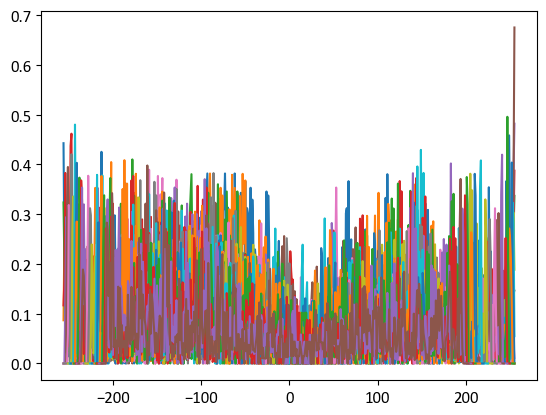

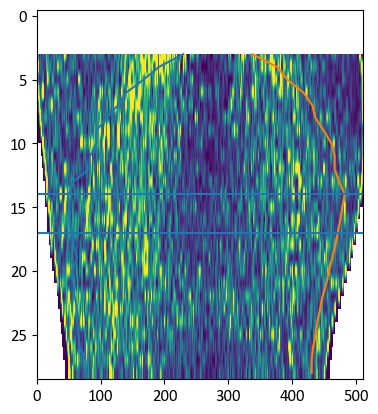

In [36]:
k2_2d = []
for f in range(fs):
# for f in [10]:
    # print('frame', f)
    fu_1, fu_2 = fu_range[f]
    if not np.isnan(fu_1):
        Z = fu_h_para_nparray[f]
        Y = fu_coord[f][1][0]
        X = fu_coord[f][1][1]
        points = [X, Y, Z]
        k2_2d_ = compute_curvature(points)
        # print(len(Z), len(points))
        k2_2d.append(k2_2d_)
    else:
        k2_2d.append(np.full(ys, np.nan))

for f in range(fs):
# for f in [10]:
    # print('frame', f)
    fu_1, fu_2 = fu_range[f]
    if not np.isnan(fu_1):
        plt.plot(np.arange(ys) - 256, k2_2d[f])
plt.show()

plt.imshow(np.array(k2_2d), aspect=20, vmin=0, vmax=0.2)
plt.plot(fu_range, np.arange(fs))
plt.axhline(y=f_m2-2)
plt.axhline(y=f_septum1-2)

In [ ]:
np.all(np.isnan(cur[256]))

In [ ]:
plt.plot(cur[256])
print(np.nanargmax(cur[256]))

In [ ]:
exp_f = 12
h = height[exp_f].copy()
fu_y, fu_x = fu_coord[exp_f][1]

fig, [ax1, ax2] = plt.subplots(1,2,subplot_kw={"projection": "3d"}, figsize =[10,5])
X = np.arange(xs)
Y = np.arange(ys)
X, Y = np.meshgrid(X,Y)

ax1.plot_wireframe(X, Y, h, rstride=25, cstride=25, zorder=-1, linewidth=0.5)
ax1.plot(xs=fu_x, ys=fu_y, zs=h[fu_y.astype(int), fu_x.astype(int)], color = 'red', linewidth = 5)

ax1.set_xlim(0, xs)
ax1.set_ylim(0, ys)
ax1.set_zlim(0, hs)
ax1.set_aspect('equal')
ax2.set_xlim(0, xs)
ax2.set_ylim(0, ys)
ax2.set_zlim(0, hs)
ax2.set_aspect('equal')
plt.show()

In [ ]:
exp_f = 12
h = height[exp_f]
fu_y, fu_x = fu_coord[exp_f][1]
fu_y_perp, fu_x_perp = fu_coord_perp[exp_f][1]

fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"}, figsize =[3, 3])

X = np.arange(xs)
Y = np.arange(ys)
X, Y = np.meshgrid(X,Y)
ax1.plot_wireframe(X, Y, h, rstride=10, cstride=10, zorder=-1, linewidth=0.5, alpha=0.5)

Z, Y = np.meshgrid(np.arange(0, hs), fu_y)
Z, X = np.meshgrid(np.arange(0, hs), fu_x)
ax1.plot_surface(X, Y, Z, alpha=0.3, color='red', zorder=1)

Z, Y = np.meshgrid(np.arange(0, hs), fu_y_perp)
Z, X = np.meshgrid(np.arange(0, hs), fu_x_perp)
ax1.plot_surface(X, Y, Z, alpha=0.3, color='cyan', zorder=1)

ax1.set_xlim(0, xs)
ax1.set_ylim(0, ys)
ax1.set_zlim(0, hs)
ax1.set_aspect('equal')
plt.savefig('3D-view-f12.svg')
plt.show()

In [ ]:
original = skimage.data.astronaut()
original.shape

In [ ]:
image = data_raw_max
image_shape = image.shape
color_converter = plt.colormaps["rainbow"]
vmin, vmax= 1000, 12000
image_scaled = (image-vmin)/(vmax-vmin)
image_colored = color_converter(image_scaled)
image_colored = skimage.color.rgba2rgb(image_colored)
skimage.io.imsave('image_colorded.tif', image_colored)
# plt.imshow(image_colored[0])

In [ ]:
image = data_raw_max
export_2d_data_with_cmap(name = 'image_colored.tif',
                         array = image,
                         cmap = 'plasma',
                         vminmax = [0, 16000])

In [ ]:
height.ndim